# EDA for Amy, Research Question 2: When to sell?

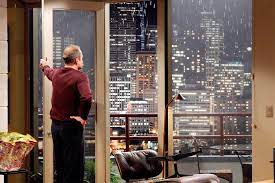

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Loading the dataset:
basic_king = pd.read_csv('data/King_County_House_prices_dataset.csv')

# Get info about the variables
basic_king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
# Changing the date to yyyy/mm which will make it easier to have a look at the change over time later on
import datetime

basic_king['date'] = pd.to_datetime(basic_king.date)
basic_king['month_sold'] = basic_king['date'].dt.to_period('M')
basic_king['month_sold'] = basic_king['month_sold'].astype(str)

In [ ]:
# Create new columns via calculation:

# df.eval('age = nr_rings + 1.5', inplace = True)

# Drop columns
# df.drop('nr_rings', inplace=True, axis=1) 


In [4]:
# Import airport dataset:

df_airports = pd.read_csv("data/airports.csv")

# Extract only airports in washington state
df_airports_wa = df_airports[df_airports['state'] == "WA"]
df_airports_wa.rename(columns={'latitude': 'lat', 'longitude':'long'}, inplace=True)
df_airports_wa.head()

,iata,name,city,state,country,lat,long
84,0S7,Dorothy Scott,Oroville,WA,USA,48.958965,-119.411962
85,0S9,Jefferson County International,Port Townsend,WA,USA,48.049814,-122.801279
191,1S0,Pierce County,Puyallup,WA,USA,47.103917,-122.287194
193,1S5,Sunnyside Municipal,Sunnyside,WA,USA,46.327631,-119.970596
280,2S1,Vashon Municipal,Vashon,WA,USA,47.458153,-122.477351


In [5]:
# Include FBI location:

fbi = pd.DataFrame({
    'name': ['FBI'],
    'lat': [47.60679669902346],
    'long': [-122.3347287439417]
})

In [6]:
# Rebuild yr_renovated column: yr_ren_new is yr_built when 0 in yr_renovated
# ren_unknown is 1 when NaN

basic_king['yr_ren_new'] = np.where(basic_king['yr_renovated'] >= basic_king['yr_built'],basic_king['yr_renovated'], basic_king['yr_built']).astype(int)
basic_king['ren_unknown']= np.where(basic_king['yr_renovated'].isna(), 1,0)
basic_king['water_str'] = basic_king['waterfront'].astype(str)

# Label top 10% of all houses based on price

basic_king["10bins"] = pd.qcut(basic_king['price'], q=10)

bin_labels_10 = ['top100','top90', 'top80', 'top70', 'top60', 'top50', 'top40', 'top30', 'top20', 'top10']
basic_king['quantile_name'] = pd.qcut(basic_king['price'],
                              q=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
                              labels=bin_labels_10)

# sns.countplot(x='10bins', data=basic_king, color='steelblue')

In [173]:
# # Select columns to drop for plotting:
# to_drop = ['id', 'long', 'lat', 'ren_unknown']

# # Plot all reasonable columns:
# basic_king.drop(to_drop, axis=1).plot(subplots=True, layout=(4,5), color='steelblue')

# plt.tight_layout()
# plt.show()

In [155]:
# sns.pairplot(basic_king)

In [7]:
# Basic map with all houses included, different colors show if house is on waterfront or not.

# fig = px.scatter_mapbox(basic_king, lat="lat", lon="long", hover_name="id", hover_data=["price", "sqft_living"],
#                         color_discrete_sequence=["red"], zoom=1, width=800, height=600)
fig = px.scatter_mapbox(basic_king, lat="lat", lon="long", hover_name="id", hover_data=["price", "sqft_living"],
                        color = 'water_str', zoom=8, width=800, height=600)
fig2 = px.scatter_mapbox(df_airports_wa, lat='lat', lon= 'long', color_discrete_sequence=["blue"], hover_name='iata')
fig3 = px.scatter_mapbox(fbi, lat='lat', lon='long', color_discrete_sequence=["red"], hover_name='name')
fig2.update_traces(marker={'size': 10})
fig3.update_traces(marker={'size': 15})
fig.add_trace(fig2.data[0])
fig.add_trace(fig3.data[0])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

## Get an idea about distributions

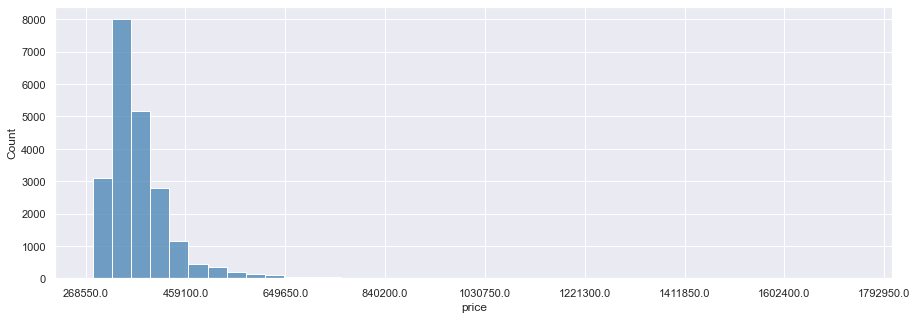

In [8]:
# Price Histogram

sns.set(rc={'figure.figsize':(15.0,5)})

bins = np.histogram_bin_edges(basic_king['price'], bins=40)
sns.histplot(basic_king['price'], bins=bins, color='steelblue').set_xticklabels(bins)

  
plt.show()

[Text(0.5, 1.0, 'Price Histogram')]

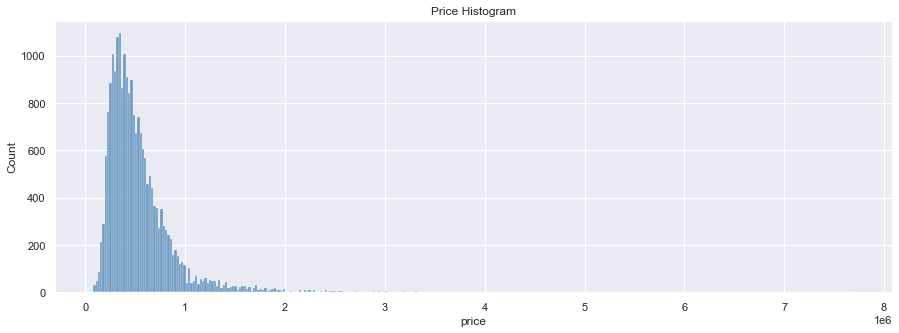

In [9]:
sns.histplot(basic_king['price'], color='steelblue').set(title='Price Histogram')

In [10]:
basic_king.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

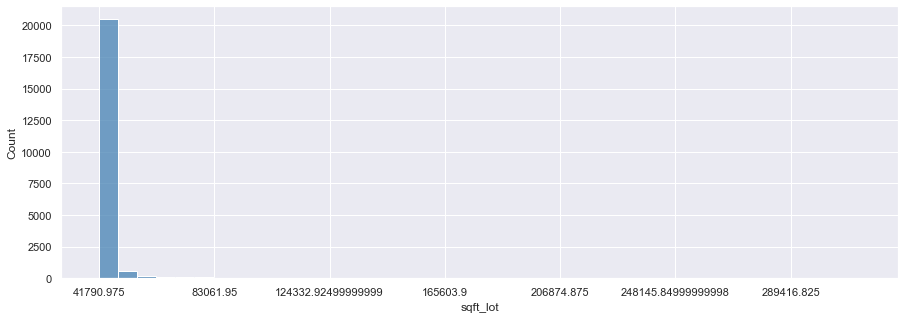

In [11]:
# sqf_lot Histogram

sns.set(rc={'figure.figsize':(15.0,5)})

bins = np.histogram_bin_edges(basic_king['sqft_lot'], bins=40)
sns.histplot(basic_king['sqft_lot'], bins=bins, color='steelblue').set_xticklabels(bins)

  
plt.show()

# # Check for (diverse) land lots:
# basic_king_lot = basic_king[(basic_king['sqft_lot'] <= 150000) & (basic_king['sqft_lot'] >= 110)]

# bins = np.histogram_bin_edges(basic_king_lot['sqft_lot'], bins=100)
# sns.histplot(basic_king_lot['sqft_lot'], bins=bins, color='steelblue').set_xticklabels(bins)

  
# plt.show()

[Text(0.5, 1.0, 'SQFT Land Lot Histogram')]

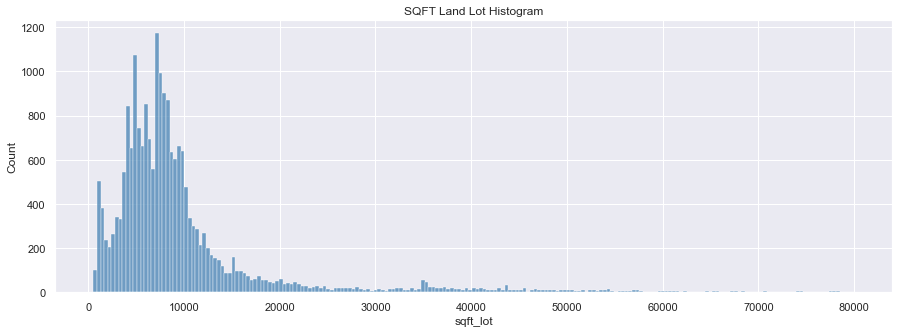

In [12]:
# Reduce dataset to smaller lots (<= 80,000)

basic_king_lot = basic_king[(basic_king['sqft_lot'] <= 80000)]


sns.histplot(basic_king_lot['sqft_lot'], color='steelblue').set(title='SQFT Land Lot Histogram')

In [13]:
basic_king.sqft_lot.describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

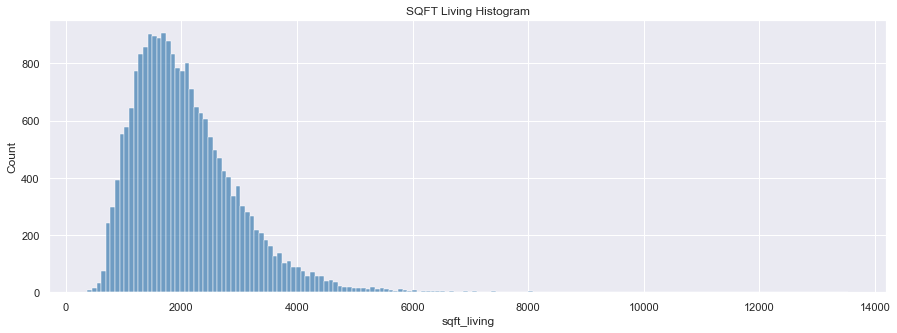

In [14]:
# Plot sqft_living to find medium sized houses 

sns.set(rc={'figure.figsize':(15.0,5)})

# bins = np.histogram_bin_edges(basic_king['sqft_living'], bins=200)
# sns.histplot(basic_king['sqft_living'], bins=bins, color='steelblue').set_xticklabels(bins)

sns.histplot(basic_king['sqft_living'], color='steelblue').set(title='SQFT Living Histogram')

plt.show

In [15]:
basic_king.sqft_living.describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

## Research Question 2: When to sell?

In [16]:
# Create dataset which only contains the top10 houses based on price:

basic_king_top10 = basic_king[basic_king['quantile_name'] == 'top10']

In [17]:
# Plot top 10 houses based on price:

fig = px.scatter_mapbox(basic_king_top10, lat="lat", lon="long", hover_name="id", hover_data=["price", "sqft_living"],
                        color = 'price', zoom=8, width=800, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

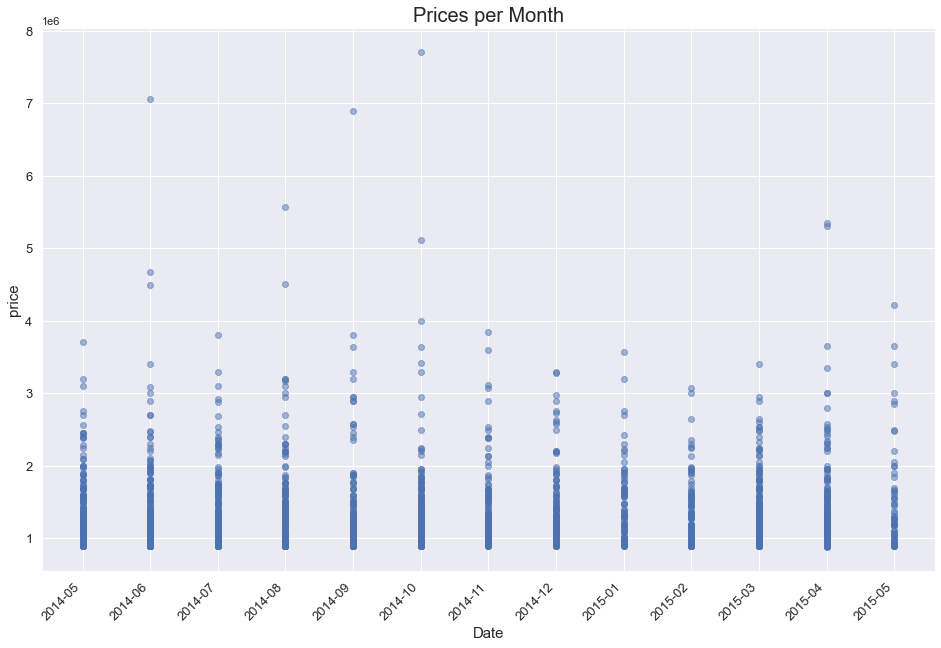

In [18]:
# Plot price against year/month:

from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(16,10))

scatter_matplot = ax.scatter(x= 'month_sold', y='price', data= basic_king_top10.sort_values('month_sold'),
            alpha=0.5,
            cmap='magma_r', # we had to set the cmap by hand because the color list is not ordered
)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Date', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.title('Prices per Month', fontsize=20)
# Here you can set that only 40 x-ticks are shown, otherwise it will be too many
# ax.xaxis.set_major_locator(MaxNLocator(40))


# ax.legend(*scatter_matplot.legend_elements(), loc='upper left', fontsize=13, title= 'Precipitation Type')
plt.show();

<AxesSubplot:xlabel='month_sold', ylabel='count'>

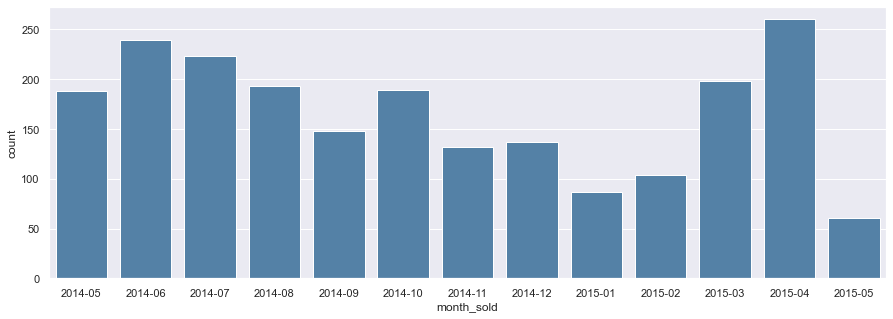

In [19]:
# Counting sold houses per month for Top10 houses based on price:

sns.countplot(x='month_sold', data=basic_king_top10.sort_values('month_sold'), color= 'steelblue')